#Importing Packages and Loading Dataset


In [130]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [131]:
dataset = fetch_california_housing()
x = dataset['data']
y = dataset['target']
feature_names = dataset['feature_names']



#Linear Regression

In [193]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

model = LinearRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

r2_s = r2_score(y_test,y_pred)
mse_err = mean_squared_error(y_test,y_pred)


print("Linear Regression r2 score = ",r2_s,"mse error = ",mse_err)


Linear Regression r2 score =  0.5774342690853553 mse error =  0.5240949425746994


#Lasso Regularization

<ipython-input-197-894ec54a208d>:11: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(x_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.351e+03, tolerance: 2.191e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


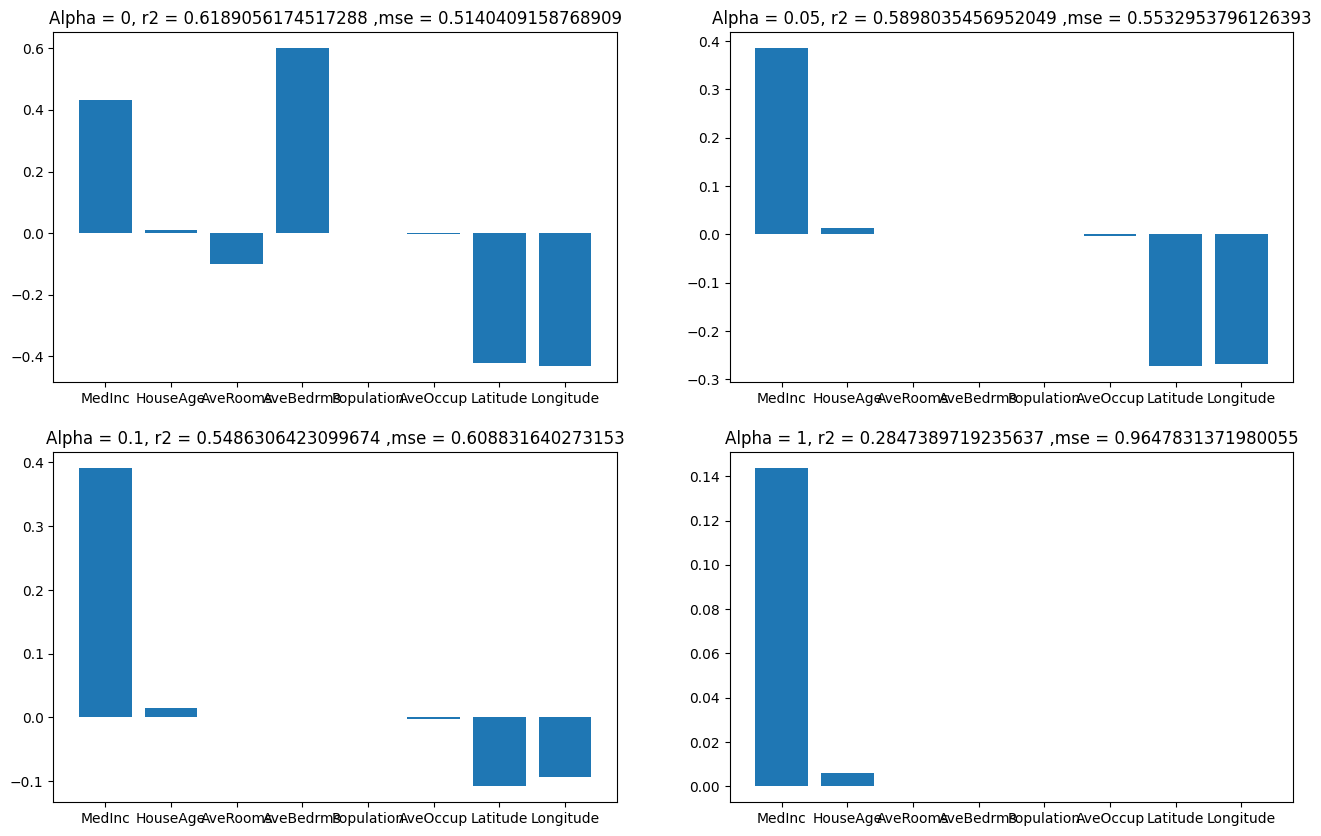

Lasso Regularization
Alpha Value =  0 R2 Score =  0.6189056174517288 MSE error =  0.5140409158768909
Alpha Value =  0.05 R2 Score =  0.5898035456952049 MSE error =  0.5532953796126393
Alpha Value =  0.1 R2 Score =  0.5486306423099674 MSE error =  0.608831640273153
Alpha Value =  1 R2 Score =  0.2847389719235637 MSE error =  0.9647831371980055


In [197]:

w = []
r2 = []
mse_err = []
alpha_list = [0, 0.05, 0.1, 1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)


for alpha in alpha_list:
    # fit model
    model = Lasso(alpha=alpha)
    model.fit(x_train, y_train)

    # prediction
    y_pred = model.predict(x_test)

    # store metrics for prediction, for each fit
    r2.append(r2_score(y_test, y_pred))
    mse_err.append(mean_squared_error(y_test,y_pred))
    w.append(model.coef_.tolist())



plt.figure(figsize=(16, 10))

for i in range(len(alpha_list)):
  plt.subplot(2, 2, i+1)
  plt.bar(feature_names, w[i])
  plt.title('Alpha = {}, r2 = {} ,mse = {}'.format(alpha_list[i], r2[i], mse_err[i]))

plt.show()


# printing values for MSE and R_error

print("Lasso Regularization")
for i in range(len(alpha_list)):
  print("Alpha Value = ",alpha_list[i],"R2 Score = ",r2[i],"MSE error = ",mse_err[i])


#Mutual Information

In [134]:
# Feature Selection

from sklearn.feature_selection import mutual_info_regression, SelectPercentile, SelectKBest

mi = mutual_info_regression(x, y)

print(mi)

[0.38718082 0.03362682 0.10329206 0.02462897 0.02114997 0.07244219
 0.37139811 0.39949805]


In [136]:
# Using Percentile

x_new = SelectPercentile(mutual_info_regression, percentile=50).fit_transform(x, y)
print(x_new.shape)

x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2_s = r2_score(y_test,y_pred)
mse_err = mean_squared_error(y_test,y_pred)
print("Linear Regression Filer using Percentile \nr2 score = ",r2_s,"mse error = ",mse_err)


(20640, 4)
Linear Regression Filer using Percentile 
r2 score =  0.6096594458432445 mse error =  0.5221258269293533


In [138]:
# Using K number

x_new = SelectKBest(mutual_info_regression, k=5).fit_transform(x, y)
print(x_new.shape)
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2_s = r2_score(y_test,y_pred)
mse_err = mean_squared_error(y_test,y_pred)
print("Linear Regression using K number \nr2 score = ",r2_s,"mse error = ",mse_err)

(20640, 5)
Linear Regression using K number 
r2 score =  0.5974260534302683 mse error =  0.5300059483433022


#Pearson  Correlation
1. Using Individual Values

In [139]:
from sklearn.feature_selection import f_regression, SelectKBest
x_new = SelectKBest(f_regression, k=8).fit_transform(x, y)
print(x_new.shape)

x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2_s = r2_score(y_test,y_pred)
mse_err = mean_squared_error(y_test,y_pred)
print("Linear Regression using Pearson Correlation Individual Values \nr2 score = ",r2_s,"mse error = ",mse_err)


(20640, 8)
Linear Regression using Pearson Correlation Individual Values 
r2 score =  0.6159294687976229 mse error =  0.5224884580442422


2. Using Mutli Corelation



In [140]:
import pandas as pd
x_pd = pd.DataFrame(x, columns=feature_names)
x_pd.head(10)
x_pd.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


Linear Regression using Pearson Correlation Mutiple Values 
r2 score =  0.6190275552882032 mse error =  0.5322101531368862


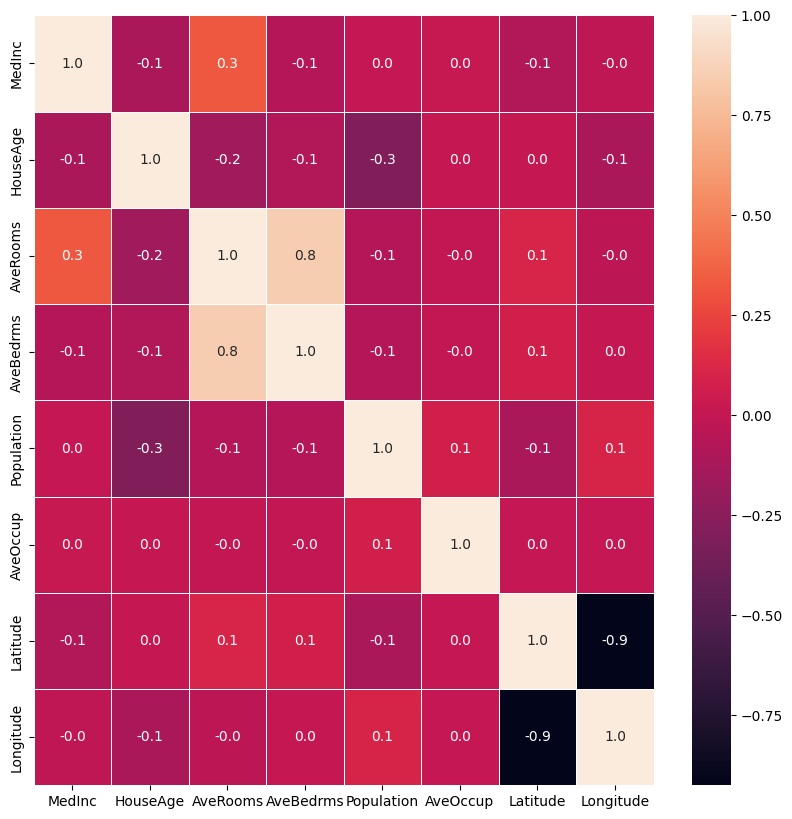

In [200]:
import seaborn as sns
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(x_pd.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

x_new = x_pd.drop(['Population', 'AveOccup'], axis=1)
x_new.head()

x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2_s = r2_score(y_test,y_pred)
mse_err = mean_squared_error(y_test,y_pred)
print("Linear Regression using Pearson Correlation Mutiple Values \nr2 score = ",r2_s,"mse error = ",mse_err)


#Recurive Feature Elimination (RFE)


In [210]:

from sklearn.feature_selection import RFE
estimator = Lasso()
selector = RFE(estimator, n_features_to_select=5, step=1).fit(x, y)
print(selector.ranking_, )

x_new = selector.transform(x)
print(x_new.shape)

x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2_s = r2_score(y_test,y_pred)
mse_err = mean_squared_error(y_test,y_pred)
print("Linear Regression using RFE \nr2 score = ",r2_s,"mse error = ",mse_err)



[1 1 4 3 1 2 1 1]
(20640, 5)
Linear Regression using RFE 
r2 score =  0.6073633870095512 mse error =  0.4950619921922094


#Sequential Feature Selection

In [213]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import RidgeCV
ridge = RidgeCV().fit(x, y)

sfs_forward = SequentialFeatureSelector(
    ridge, n_features_to_select="auto", direction="forward"
).fit(x, y)

X_new = sfs_forward.transform(x)
X_new.shape
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2_s = r2_score(y_test,y_pred)
mse_err = mean_squared_error(y_test,y_pred)
print("Linear Regression using Sequential Feature Selection \nr2 score = ",r2_s,"mse error = ",mse_err)


Linear Regression using Sequential Feature Selection 
r2 score =  0.6049003025810198 mse error =  0.5359454240014688


#PCA

In [217]:
from sklearn.decomposition import PCA
X_new = PCA(n_components=4, svd_solver='full').fit_transform(x)
print(X_new.shape)

(20640, 4)


In [218]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2_s = r2_score(y_test,y_pred)
mse_err = mean_squared_error(y_test,y_pred)
print("Linear Regression using PCA \nr2 score = ",r2_s,"mse error = ",mse_err)


Linear Regression using PCA 
r2 score =  0.6110882638069264 mse error =  0.5077479429256242
